<a href="https://colab.research.google.com/github/dency-claris/applied-ml-mids-2024/blob/master/Project_Part_1_Dency_Claris_Thomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [32]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [33]:
## Change this part with your own dataset files

src_train = '/content/application_train.csv.zip'
src_test = '/content/application_test.csv.zip'

src_previous ='/content/previous_application.csv.zip'
src_bureau = '/content/bureau.csv.zip'

# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

app_train = pd.read_csv(src_train, compression="zip")
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [34]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
app_test =pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past = pd.read_csv(src_previous, compression="zip")

In [35]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [18]:
app_past.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# 2 - The number of rows and columns for each
print("Number of rows in application train dataset:", app_train.shape[0], "and number of columns in application train dataset:", app_train.shape[1])
print("Number of rows in application test dataset:", app_test.shape[0], "and number of columns in application test dataset:", app_test.shape[1])
print("Number of rows in bureau is:", bureau.shape[0], "and number of columns in bureau is:", bureau.shape[1])
print("Number of rows in app_past is:", app_past.shape[0], "and number of columns in app_past is:", app_past.shape[1])

Number of rows in application train dataset: 307511 and number of columns in application train dataset: 122
Number of rows in application test dataset: 48744 and number of columns in application test dataset: 121
Number of rows in bureau is: 1716428 and number of columns in bureau is: 17
Number of rows in app_past is: 1670214 and number of columns in app_past is: 37


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [20]:
# 3a: Missing values in app_test
missing_test = app_test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print("Columns with the most missing values in app_test:\n", missing_test.head(10))

Columns with the most missing values in app_test:
 COMMONAREA_MODE             33495
COMMONAREA_MEDI             33495
COMMONAREA_AVG              33495
NONLIVINGAPARTMENTS_MEDI    33347
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
FONDKAPREMONT_MODE          32797
LIVINGAPARTMENTS_MODE       32780
LIVINGAPARTMENTS_MEDI       32780
LIVINGAPARTMENTS_AVG        32780
dtype: int64


In [21]:
# 3b: Missing values in bureau
missing_bureau = bureau.isnull().sum()
missing_bureau = missing_bureau[missing_bureau > 0].sort_values(ascending=False)
print("Columns with the most missing values in bureau:\n", missing_bureau)


Columns with the most missing values in bureau:
 AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
dtype: int64


In [22]:
# 3c: Missing values in app_past
missing_past = app_past.isnull().sum()
missing_past = missing_past[missing_past > 0].sort_values(ascending=False)
print("Columns with the most missing values in app_past:\n", missing_past.head(10))


Columns with the most missing values in app_past:
 RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
dtype: int64


In [23]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

# Fill categorical columns with the mode (most frequent value)
categorical_columns = app_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    app_test[col] = app_test[col].fillna(app_test[col].mode()[0])  # Assign back to the DataFrame

# Fill numerical columns with the median (to handle skewed data)
numerical_columns = app_test.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    app_test[col] = app_test[col].fillna(app_test[col].median())  # Assign back to the DataFrame

# Check if all missing values have been handled
print("Missing values after imputation in app_test:", app_test.isnull().sum().sum())



Missing values after imputation in app_test: 0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

**Approach:**
1. *Categorical columns:* For categorical variables, I am imputing the missing values using the mode ie, the most frequent category.
2. *Numerical columns:* For numerical variables, I am using median imputation to replace missing values to avoid outliers in skewed data.

This avoids data leakage by using simple imputation techniques based on the data in the app_test itself.



## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

Class distribution:
 TARGET
0    282686
1     24825
Name: count, dtype: int64


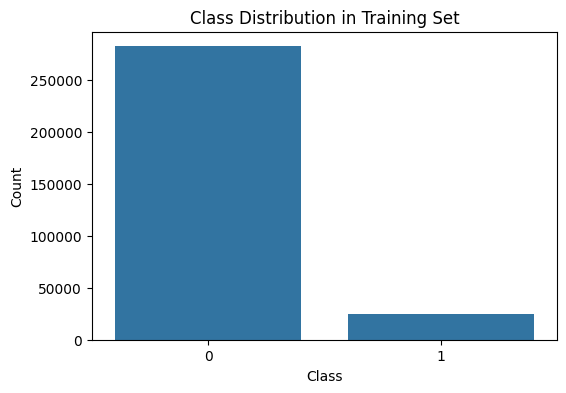

In [24]:
# 5 - value counts
class_counts = app_train['TARGET'].value_counts()
print("Class distribution:\n", class_counts)

# 5 - histograms
# Plot the class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


**5**: Describe briefly your observation (double click to edit a text cell)

The distribution is highly imbalanced with Target value 0 being quite higher than Target value 1.

In [7]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/

## Your code here
app_train_original = app_train.copy()

# We will use the dataframe app_train from 6.a in the following

In [8]:
# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

# Undersampling

# Separate the majority and minority classes
minority_class = app_train[app_train['TARGET'] == 1]
majority_class = app_train[app_train['TARGET'] == 0]

# Undersample the majority class to match the minority class
majority_class_undersampled = majority_class.sample(len(minority_class))

# Combine the undersampled majority class with the minority class
app_train_balanced = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the dataset
app_train_balanced = app_train_balanced.sample(frac=1).reset_index(drop=True)

# Check new class distribution
print("New class distribution after undersampling:\n", app_train_balanced['TARGET'].value_counts())


New class distribution after undersampling:
 TARGET
1    24825
0    24825
Name: count, dtype: int64


In [8]:
# Oversampling

# Oversample the minority class to match the majority class
minority_class_oversampled = minority_class.sample(len(majority_class), replace=True)

# Combine the oversampled minority class with the majority class
app_train_balanced = pd.concat([minority_class_oversampled, majority_class])

# Shuffle the dataset
app_train_balanced = app_train_balanced.sample(frac=1).reset_index(drop=True)

# Check new class distribution
print("New class distribution after oversampling:\n", app_train_balanced['TARGET'].value_counts())


New class distribution after oversampling:
 TARGET
1    282686
0    282686
Name: count, dtype: int64


In [9]:
# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.
from imblearn.over_sampling import SMOTE

# Extract features (X) and target (y)
y = app_train_balanced['TARGET']
X = app_train_balanced.drop('TARGET', axis=1)

# First, ensure that missing values in the original dataframe are handled before applying one-hot encoding

# Fill missing numerical values with the median
X_numeric = X.select_dtypes(include=[np.number])
X_numeric = X_numeric.fillna(X_numeric.median())

# Fill missing categorical values with the mode
X_categorical = X.select_dtypes(exclude=[np.number])
X_categorical = X_categorical.fillna(X_categorical.mode().iloc[0])

# Now combine both the numeric and categorical parts
X_filled = pd.concat([X_numeric, X_categorical], axis=1)

# One-hot encode categorical variables again after filling missing values
X_encoded = pd.get_dummies(X_filled)

# Now check the shape of the encoded DataFrame
print("Shape of X after imputation and one-hot encoding:", X_encoded.shape)

# Apply SMOTE now
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

app_train_smote = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.Series(y_resampled, name='TARGET')], axis=1)

# Check new class distribution after SMOTE
print("Class distribution after SMOTE:\n", app_train_smote['TARGET'].value_counts())


Shape of X after imputation and one-hot encoding: (49650, 243)
Class distribution after SMOTE:
 TARGET
1    24825
0    24825
Name: count, dtype: int64


<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [25]:
app_test_original = app_test.copy()

In [ ]:
app_test_original.NAME_HOUSING_TYPE.head()

,NAME_HOUSING_TYPE
0,House / apartment
1,House / apartment
2,House / apartment
3,House / apartment
4,House / apartment


In [ ]:
app_test = app_test_original.copy()

In [26]:
#7a

# Create a copy of the original column before one-hot encoding
app_test['NAME_HOUSING_TYPE_ORIGINAL'] = app_test['NAME_HOUSING_TYPE']

# One-hot encode NAME_HOUSING_TYPE
app_test = pd.get_dummies(app_test, columns=['NAME_HOUSING_TYPE'], drop_first=False)

# Label encode CODE_GENDER (e.g., M: 0, F: 1)
app_test['CODE_GENDER'] = app_test['CODE_GENDER'].map({'M': 0, 'F': 1})

# Verify transformation
print(app_test[['CODE_GENDER']].head())
print(app_test.filter(like='NAME_HOUSING_TYPE').head())  # Check one-hot encoded columns


   CODE_GENDER
0            1
1            0
2            0
3            1
4            0
  NAME_HOUSING_TYPE_ORIGINAL  NAME_HOUSING_TYPE_Co-op apartment  \
0          House / apartment                              False   
1          House / apartment                              False   
2          House / apartment                              False   
3          House / apartment                              False   
4          House / apartment                              False   

   NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  \
0                                 True                                  False   
1                                 True                                  False   
2                                 True                                  False   
3                                 True                                  False   
4                                 True                                  False   

   NAME_HOUSING_TYPE

<ipython-input-26-7cbb41de3a54>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  app_test['NAME_HOUSING_TYPE_ORIGINAL'] = app_test['NAME_HOUSING_TYPE']


In [27]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_ORIGINAL,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100001,Cash loans,1,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,House / apartment,False,True,False,False,False,False
1,100005,Cash loans,0,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,3.0,House / apartment,False,True,False,False,False,False
2,100013,Cash loans,0,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,1.0,4.0,House / apartment,False,True,False,False,False,False
3,100028,Cash loans,1,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,3.0,House / apartment,False,True,False,False,False,False
4,100038,Cash loans,0,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,2.0,House / apartment,False,True,False,False,False,False


In [ ]:
co_op_apartment = app_test['NAME_HOUSING_TYPE_Co-op apartment'].value_counts()
co_op_apartment

,count
NAME_HOUSING_TYPE_Co-op apartment,
False,48621
True,123


In [ ]:
house = app_test['NAME_HOUSING_TYPE_House / apartment'].value_counts()
house

,count
NAME_HOUSING_TYPE_House / apartment,
True,43645
False,5099


In [ ]:
Municipal = app_test['NAME_HOUSING_TYPE_Municipal apartment'].value_counts()
Municipal

,count
NAME_HOUSING_TYPE_Municipal apartment,
False,47127
True,1617


In [ ]:
Office = app_test['NAME_HOUSING_TYPE_Office apartment'].value_counts()
Office

,count
NAME_HOUSING_TYPE_Office apartment,
False,48337
True,407


In [ ]:
Rented = app_test['NAME_HOUSING_TYPE_Rented apartment'].value_counts()
Rented

,count
NAME_HOUSING_TYPE_Rented apartment,
False,48026
True,718


In [ ]:
with_parents = app_test['NAME_HOUSING_TYPE_With parents'].value_counts()
with_parents

,count
NAME_HOUSING_TYPE_With parents,
False,46510
True,2234


In [28]:
from sklearn.preprocessing import LabelEncoder

# Grouping 'NAME_HOUSING_TYPE' into 3 categories
def group_housing_type(x):
    if x in ['House / apartment', 'With parents', 'Municipal apartment']:
        return x
    else:
        return 'Other'

app_test['NAME_HOUSING_TYPE_GROUPED'] = app_test['NAME_HOUSING_TYPE_ORIGINAL'].apply(group_housing_type)

# One-hot encode the grouped NAME_HOUSING_TYPE
app_test = pd.get_dummies(app_test, columns=['NAME_HOUSING_TYPE_GROUPED'], drop_first=False)

# Label encode FLAG_OWN_CAR
le = LabelEncoder()
app_test['FLAG_OWN_CAR'] = le.fit_transform(app_test['FLAG_OWN_CAR'])

# Verify transformations
print(app_test[['FLAG_OWN_CAR']].head())
print(app_test.filter(like='NAME_HOUSING_TYPE_GROUPED').head())  # Check one-hot encoded columns


   FLAG_OWN_CAR
0             0
1             0
2             1
3             0
4             1
   NAME_HOUSING_TYPE_GROUPED_House / apartment  \
0                                         True   
1                                         True   
2                                         True   
3                                         True   
4                                         True   

   NAME_HOUSING_TYPE_GROUPED_Municipal apartment  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   NAME_HOUSING_TYPE_GROUPED_Other  NAME_HOUSING_TYPE_GROUPED_With parents  
0                            False                                   False  
1                            False                                   False  
2                            False                         

In [29]:
# Drop Name_housing_Type that we created earlier in 7.a
# Check if the columns exist before attempting to drop them
column_names = ('NAME_HOUSING_TYPE_ORIGINAL','NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents')
columns_to_drop = [col for col in column_names if col in app_test.columns]

# If any columns to drop are found, proceed with dropping them
if columns_to_drop:
    app_test = app_test.drop(columns=columns_to_drop)
else:
    print("None of the specified columns were found in the DataFrame.")

In [ ]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_GROUPED_House / apartment,NAME_HOUSING_TYPE_GROUPED_Municipal apartment,NAME_HOUSING_TYPE_GROUPED_Other,NAME_HOUSING_TYPE_GROUPED_With parents
0,100001,Cash loans,1,0,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
1,100005,Cash loans,0,0,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,True,False,False,False
2,100013,Cash loans,0,1,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,1.0,4.0,True,False,False,False
3,100028,Cash loans,1,0,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,True,False,False,False
4,100038,Cash loans,0,1,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,0.0,2.0,True,False,False,False


In [30]:
# 7.c
# Calculate the percentage of each category
organization_type_counts = app_test['ORGANIZATION_TYPE'].value_counts(normalize=True)

# Keep categories that appear in more than 10%, others will be 'Other'
app_test['ORGANIZATION_TYPE_GROUPED'] = app_test['ORGANIZATION_TYPE'].apply(
    lambda x: x if organization_type_counts[x] > 0.10 else 'Other'
)

# One-hot encode ORGANIZATION_TYPE_GROUPED
app_test = pd.get_dummies(app_test, columns=['ORGANIZATION_TYPE_GROUPED'], drop_first=False)

# Verify transformation
print(app_test.filter(like='ORGANIZATION_TYPE_GROUPED').head())

# Check the size of the dummy vector
print("Size of dummy vector for ORGANIZATION_TYPE after transformation:",
      app_test.filter(like='ORGANIZATION_TYPE_GROUPED').shape[1])

   ORGANIZATION_TYPE_GROUPED_Business Entity Type 3  \
0                                             False   
1                                             False   
2                                             False   
3                                              True   
4                                              True   

   ORGANIZATION_TYPE_GROUPED_Other  ORGANIZATION_TYPE_GROUPED_Self-employed  \
0                             True                                    False   
1                            False                                     True   
2                             True                                    False   
3                            False                                    False   
4                            False                                    False   

   ORGANIZATION_TYPE_GROUPED_XNA  
0                          False  
1                          False  
2                          False  
3                          False  
4                  

In [31]:
# 8
# Define a function to apply one-hot encoding to all categorical columns
def one_hot_encode(df):
    return pd.get_dummies(df, drop_first=False)

# Apply one-hot encoding to app_test, app_past, and bureau
app_test_encoded = one_hot_encode(app_test)
app_past_encoded = one_hot_encode(app_past)
bureau_encoded = one_hot_encode(bureau)

# Check the shape of each after one-hot encoding
print("Shape of app_test after one-hot encoding:", app_test_encoded.shape)
print("Shape of app_past after one-hot encoding:", app_past_encoded.shape)
print("Shape of bureau after one-hot encoding:", bureau_encoded.shape)


Shape of app_test after one-hot encoding: (48744, 242)
Shape of app_past after one-hot encoding: (1670214, 164)
Shape of bureau after one-hot encoding: (1716428, 37)


In [ ]:
app_test_encoded.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,1,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,...,False,False,False,False,False,False,True,False,True,False
1,100005,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,False,False,False,False,False,True,False,False,True,False
2,100013,0,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,...,False,False,False,False,False,True,False,False,True,False
3,100028,1,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,...,False,False,False,False,False,True,False,False,True,False
4,100038,0,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
app_past_encoded.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,0.0,...,False,False,False,False,False,False,True,False,False,False
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,NaN,...,True,False,False,False,False,False,False,False,False,False
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,NaN,...,False,True,False,False,False,False,False,False,False,False
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
bureau_encoded.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,False,False,False,False,False,False,False,False,False,False
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,False,False,False,False,False,False,False,False,False,False
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,False,False,False,False,False,False,False,False,False,False


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [ ]:
## Your code here
app_test_encoded.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(dropna=False)

,count
DEF_30_CNT_SOCIAL_CIRCLE,
0.0,43224
1.0,4443
2.0,834
3.0,189
4.0,40
5.0,8
6.0,3
34.0,3


count    48744.000000
mean         0.143566
std          0.514272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


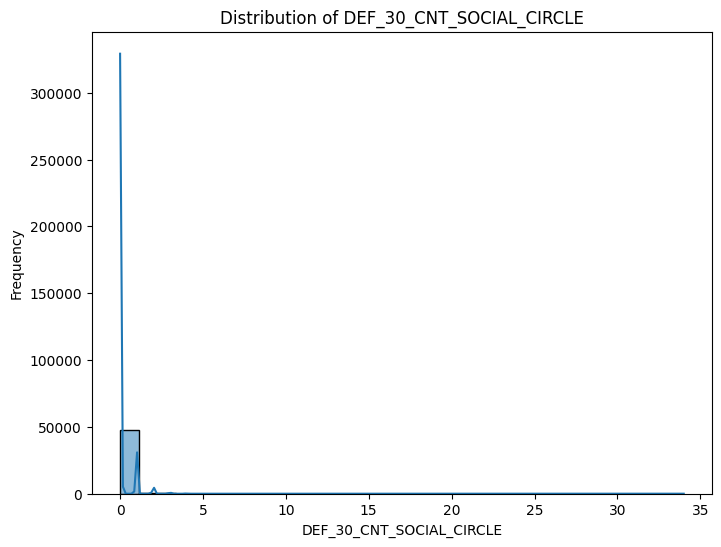

In [ ]:
# Check the distribution and summary statistics for DEF_30_CNT_SOCIAL_CIRCLE
print(app_test_encoded['DEF_30_CNT_SOCIAL_CIRCLE'].describe())

# Plot a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded['DEF_30_CNT_SOCIAL_CIRCLE'], bins=30, kde=True)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')
plt.show()


**9.a:** **DEF_30_CNT_SOCIAL_CIRCLE Anomalies**

* Value counts show that most values are 0, and a few outliers (like 34) exist. However, there are no negative values, so that’s not an issue.

* Summary statistics reveal that the mean is 0.14, but the max value is 34, which seems extremely high compared to the rest.

* So we are going to remove the outlier (anomaly value).

In [ ]:
app_test_encoded_cleaned = app_test_encoded.copy()

In [ ]:
# Identify anomaly
anomaly_value = 34
app_test_encoded_cleaned.loc[app_test_encoded_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'] == anomaly_value, 'DEF_30_CNT_SOCIAL_CIRCLE'] = 0

In [ ]:
app_test_encoded_cleaned.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(dropna=False)

,count
DEF_30_CNT_SOCIAL_CIRCLE,
0.0,43227
1.0,4443
2.0,834
3.0,189
4.0,40
5.0,8
6.0,3


count    48744.000000
mean         0.141474
std          0.440367
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


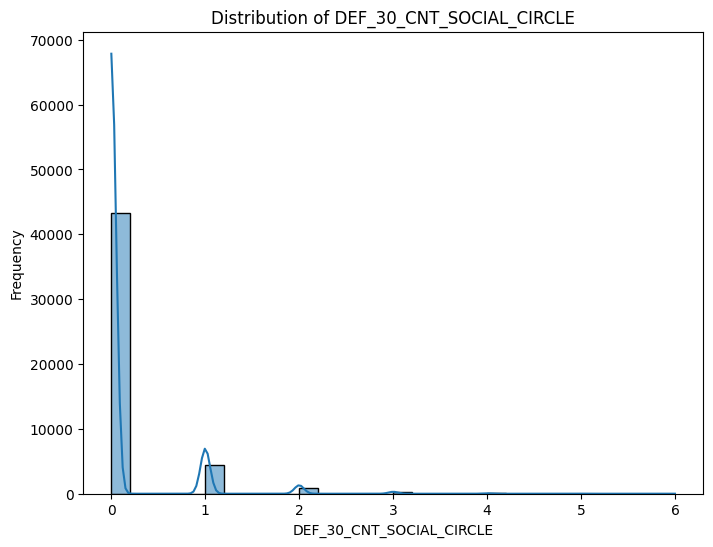

In [ ]:


# Check the distribution and summary statistics for DEF_30_CNT_SOCIAL_CIRCLE
print(app_test_encoded_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'].describe())

# Plot a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded_cleaned['DEF_30_CNT_SOCIAL_CIRCLE'], bins=30, kde=True)
plt.title('Distribution of DEF_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 9.b
app_test_encoded.LANDAREA_AVG.head(10)

,LANDAREA_AVG
0,0.0483
1,0.0483
2,0.0483
3,0.2042
4,0.0483
5,0.1683
6,0.0483
7,0.0483
8,0.0483
9,0.0483


In [ ]:
app_test_encoded.LANDAREA_AVG.value_counts(dropna=False)

,count
LANDAREA_AVG,
0.0483,28272
0.0000,2656
0.0141,37
0.0158,33
0.0114,33
...,...
0.2692,1
0.2514,1
0.1364,1


count    48744.000000
mean         0.056241
std          0.053918
min          0.000000
25%          0.048300
50%          0.048300
75%          0.048300
max          1.000000
Name: LANDAREA_AVG, dtype: float64


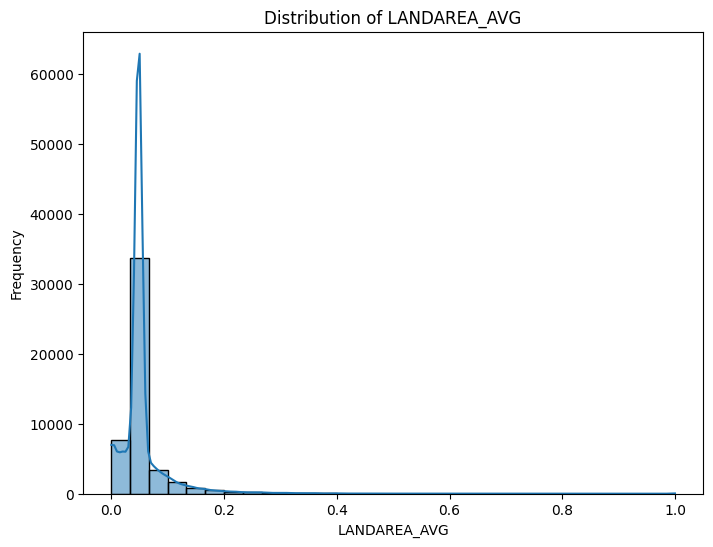

In [ ]:
print(app_test_encoded.LANDAREA_AVG.describe())

# Plot to visualise the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded['LANDAREA_AVG'], bins=30, kde=True)
plt.title('Distribution of LANDAREA_AVG')
plt.xlabel('LANDAREA_AVG')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for negative values
neg_values = app_test[app_test['LANDAREA_AVG'] < 0]['LANDAREA_AVG']
print(neg_values)

Series([], Name: LANDAREA_AVG, dtype: float64)


**9.b: LANDAREA_AVG Anomaly**
* Using value_counts we can see that most of the value is equal to 0.0483 which may be the median value that we assigned while handling the missing data (NaN).

* So LANDAREA_AVG has alot of missing data and that was replaced by the median value in the dataset.



In [ ]:
# 9.c
app_test_encoded.AMT_INCOME_TOTAL.value_counts(dropna=False)

,count
AMT_INCOME_TOTAL,
135000.0,5562
112500.0,4851
157500.0,4435
180000.0,4205
225000.0,3764
...,...
114219.0,1
84717.0,1
91935.0,1


count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


Text(0, 0.5, 'Frequency')

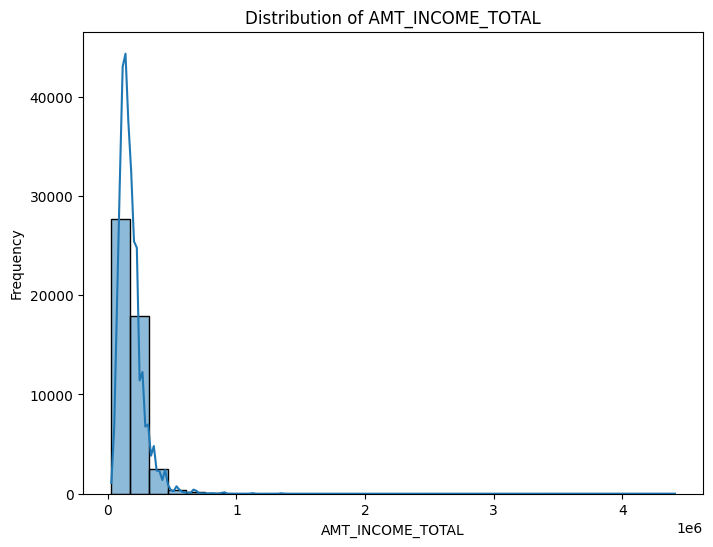

In [ ]:
# Check the distribution and summary statistics for AMT_INCOME_TOTAL
print(app_test_encoded['AMT_INCOME_TOTAL'].describe())

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')


**9c: AMT_INCOME_TOTAL Anomalies**
* Value counts show a large number of people with incomes clustered around common values like 135,000, 112,500, etc., which is typical.

* Summary statistics show a maximum value of over 4 million, which is extremely high compared to the mean of 178,000. This likely represents an outlier.

* The very high incomes (e.g., 4.41 million) are outliers and should be treated as anomalies.

* We can treat these high values using the IQR method to identify and cap outliers.

In [ ]:
# Detect and handle outliers using the IQR method
Q1 = app_test_encoded_cleaned['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = app_test_encoded_cleaned['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (app_test_encoded_cleaned['AMT_INCOME_TOTAL'] > (Q3 + 1.5 * IQR))

# Replace outliers with the median value
median_value = app_test_encoded_cleaned['AMT_INCOME_TOTAL'].median()
app_test_encoded_cleaned.loc[outlier_condition, 'AMT_INCOME_TOTAL'] = median_value

In [ ]:
outlier_condition

,AMT_INCOME_TOTAL
0,False
1,False
2,False
3,False
4,False
...,...
48739,False
48740,False
48741,False
48742,False


count     48744.000000
mean     166591.874633
std       69296.593307
min       26941.500000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      393750.000000
Name: AMT_INCOME_TOTAL, dtype: float64


Text(0, 0.5, 'Frequency')

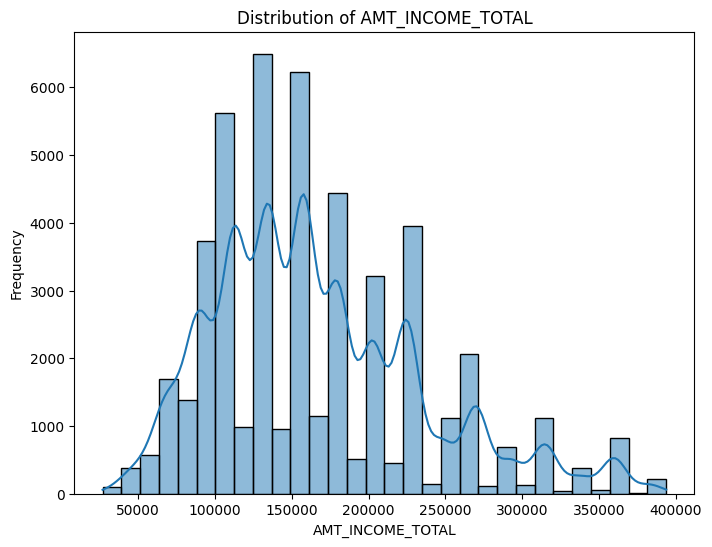

In [ ]:
# Check the distribution and summary statistics for AMT_INCOME_TOTAL
print(app_test_encoded_cleaned['AMT_INCOME_TOTAL'].describe())

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded_cleaned['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')

In [ ]:
# 10
app_test_encoded.DAYS_EMPLOYED.value_counts()

,count
DAYS_EMPLOYED,
365243,9274
-1119,32
-389,31
-1240,30
-148,28
...,...
-9004,1
-3458,1
-8098,1


In [ ]:
app_test_encoded.DAYS_EMPLOYED.head()

,DAYS_EMPLOYED
0,-2329
1,-4469
2,-4458
3,-1866
4,-2191


In [ ]:
# Check for negative values
neg_values = app_test_encoded[app_test['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']
print(neg_values)
neg_values.value_counts()

0       -2329
1       -4469
2       -4458
3       -1866
4       -2191
         ... 
48739   -5169
48740   -1149
48741   -3037
48742   -2731
48743    -633
Name: DAYS_EMPLOYED, Length: 39470, dtype: int64


,count
DAYS_EMPLOYED,
-1119,32
-389,31
-1240,30
-148,28
-277,27
...,...
-7562,1
-6014,1
-9748,1


count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


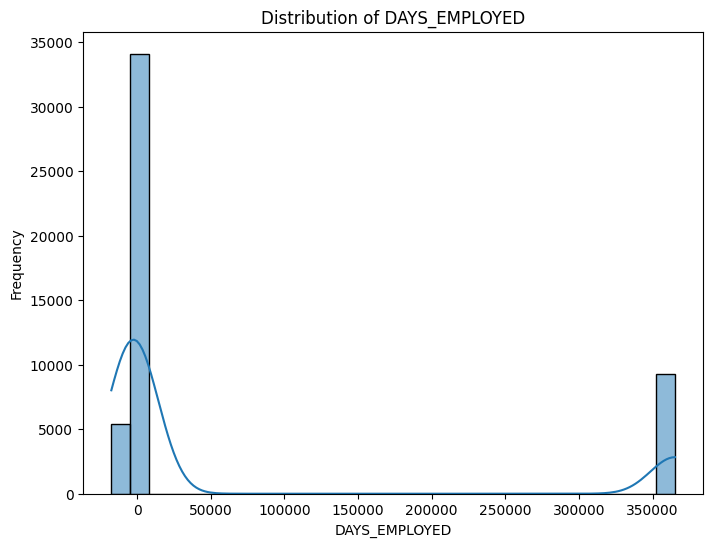

In [ ]:
print(app_test_encoded['DAYS_EMPLOYED'].describe())

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test['DAYS_EMPLOYED'], bins=30, kde=True)
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.show()

**10: Fix the Anomaly in DAYS_EMPLOYED**
* Value counts show that there are several negative values, which are fine as they likely represent days of employment before applying.
* However, the max value is 365,243, which is an extremely large number and is likely an anomaly value

In [ ]:
# Identify anomaly
anomaly_value = 365243
app_test_encoded_cleaned.loc[app_test['DAYS_EMPLOYED'] == anomaly_value, 'DAYS_EMPLOYED'] = 0

count    48744.000000
mean     -2005.516289
std       2293.095490
min     -17463.000000
25%      -2910.000000
50%      -1293.000000
75%       -296.000000
max          0.000000
Name: DAYS_EMPLOYED, dtype: float64


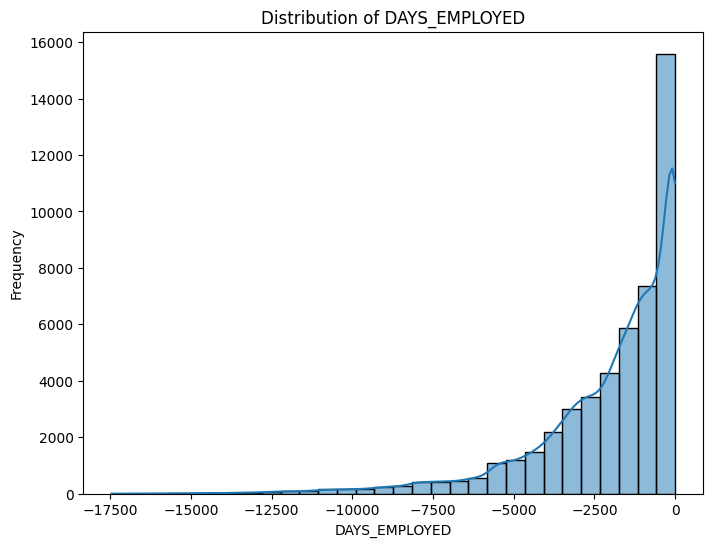

In [ ]:
print(app_test_encoded_cleaned['DAYS_EMPLOYED'].describe())

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
sns.histplot(app_test_encoded_cleaned['DAYS_EMPLOYED'], bins=30, kde=True)
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.show()

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
# Compute the correlation matrix
corr_matrix = app_test_encoded_cleaned.corr()

# Set the threshold for collinearity (usually between 0.8 and 0.9)
threshold = 0.9

# Create an empty set to hold features to drop
collinear_features = set()

# Iterate over the correlation matrix and find pairs of highly correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:  # Check if correlation exceeds the threshold
            collinear_features.add(corr_matrix.columns[i])

# Drop the collinear features from app_test
app_test_cleaned = app_test_encoded_cleaned.drop(columns=collinear_features)

# Output the collinear features that were dropped
print(f"Collinear features removed: {collinear_features}")


Collinear features removed: {'ELEVATORS_MODE', 'AMT_GOODS_PRICE', 'ORGANIZATION_TYPE_Self-employed', 'FLOORSMIN_MEDI', 'FLOORSMAX_MODE', 'ENTRANCES_MEDI', 'ELEVATORS_MEDI', 'EMERGENCYSTATE_MODE_Yes', 'FLOORSMAX_MEDI', 'LIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'ORGANIZATION_TYPE_Business Entity Type 3', 'NONLIVINGAREA_MEDI', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMIN_MODE', 'FLAG_OWN_REALTY_Y', 'BASEMENTAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'TOTALAREA_MODE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'APARTMENTS_MODE', 'YEARS_BUILD_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAPARTMENTS_MEDI', 'NAME_CONTRACT_TYPE_Revolving loans', 'APARTMENTS_MEDI', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'ORGANIZATION_TYPE_XNA', 'COMMONAREA_MODE', 'LIVINGAREA_MODE', 'ENTRANCES_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_MODE', 'ORGANIZATION_TYPE_GROUPED_XNA', 'NAME_INCOME_TYPE_Pensioner'}


**11: Remove Collinear Features in app_test**

* Collinearity refers to the linear relationship between two or more features in the dataset. Highly correlated features can affect model performance, particularly in models like linear regression.

* A common threshold for identifying multicollinearity is 0.9 because it indicates a strong linear relationship between the variables.

* We can calculate the correlation matrix for the dataset and drop features that have a correlation greater than or equal to this threshold.

In [1]:
src_train = '/content/application_train.csv.zip'
src_test = '/content/application_test.csv.zip'

src_previous ='/content/previous_application.csv.zip'
src_bureau = '/content/bureau.csv.zip'

In [4]:
app_train = pd.read_csv(src_train, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")

In [5]:
# 12

# Identify features that could be useful by calculating correlation with the target
# First, we need to merge the bureau data with the training data based on common ID (assuming 'SK_ID_CURR' is the common key)
train_with_bureau = pd.merge(app_train, bureau, on='SK_ID_CURR', how='left')

# Check feature importance using a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define X and y
X = train_with_bureau.drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop target and ID columns
y = train_with_bureau['TARGET']

# Fill any missing values with the median (since Random Forest handles missing data poorly)
# Select only numeric columns for median imputation
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median()) # Fill any missing values with the median for numeric columns only

# Convert object columns (categorical features) to numeric using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str)) # astype(str) handles mixed types


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with bureau features: {accuracy:.4f}")



Random Forest Accuracy with bureau features: 0.9849


In [6]:
# Step 4: Compare with the baseline model (Random Forest without bureau.csv features)
# Define X and y
X = app_train.drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop target and ID columns
y = app_train['TARGET']

# Fill any missing values with the median (since Random Forest handles missing data poorly)
# Select only numeric columns for median imputation
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median()) # Fill any missing values with the median for numeric columns only

# Convert object columns (categorical features) to numeric using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str)) # astype(str) handles mixed types


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy without bureau features: {accuracy:.4f}")

Random Forest Accuracy without bureau features: 0.9195


##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


Performance metrics for undersampled data with Random Forest:
Accuracy: 0.675730110775428
Precision: 0.6870432827431141
Recall: 0.652562733582488
F1-score: 0.6693592552026287
[[5176 2227]
 [2603 4889]]


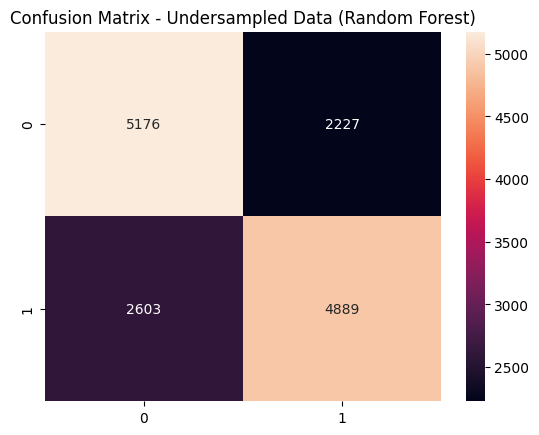

In [12]:
## Your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate the features and target for undersampled data (before SMOTE)
X_undersampled = app_train_balanced.drop('TARGET', axis=1)
y_undersampled = app_train_balanced['TARGET']

# Train-test split for undersampled data
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Identify categorical columns in X_train_us (or X_undersampled before splitting)
categorical_cols = X_train_us.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # One-hot encode categorical features
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train_us.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_cols)])

# Create a pipeline that includes preprocessing and the Random Forest model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the pipeline to the training data
pipeline.fit(X_train_us, y_train_us)

# Predictions and performance for undersampled data
y_pred_us = pipeline.predict(X_test_us)

# Predictions and performance for undersampled data
accuracy_us = accuracy_score(y_test_us, y_pred_us)
precision_us = precision_score(y_test_us, y_pred_us)
recall_us = recall_score(y_test_us, y_pred_us)
f1_us = f1_score(y_test_us, y_pred_us)

# Print metrics for undersampled data
print("Performance metrics for undersampled data with Random Forest:")
print(f"Accuracy: {accuracy_us}")
print(f"Precision: {precision_us}")
print(f"Recall: {recall_us}")
print(f"F1-score: {f1_us}")
print(confusion_matrix(y_test_us, y_pred_us))

# Plot confusion matrix for undersampled data
sns.heatmap(confusion_matrix(y_test_us, y_pred_us), annot=True, fmt="d")
plt.title("Confusion Matrix - Undersampled Data (Random Forest)")
plt.show()


Performance metrics for SMOTE data with Random Forest:
Accuracy: 0.6731789191003692
Precision: 0.6847887323943662
Recall: 0.6489588894821142
F1-score: 0.6663925438596491
[[5165 2238]
 [2630 4862]]


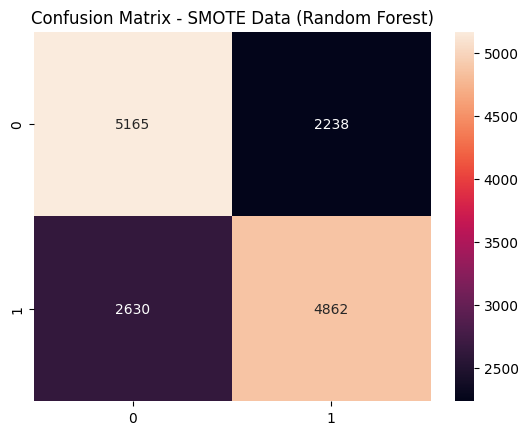

In [13]:

# Train-test split for SMOTE data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predictions and performance for SMOTE data
y_pred_smote = rf_smote.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
precision_smote = precision_score(y_test_smote, y_pred_smote)
recall_smote = recall_score(y_test_smote, y_pred_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)

# Print metrics for SMOTE data
print("Performance metrics for SMOTE data with Random Forest:")
print(f"Accuracy: {accuracy_smote}")
print(f"Precision: {precision_smote}")
print(f"Recall: {recall_smote}")
print(f"F1-score: {f1_smote}")
print(confusion_matrix(y_test_smote, y_pred_smote))

# Plot confusion matrix for SMOTE data
sns.heatmap(confusion_matrix(y_test_smote, y_pred_smote), annot=True, fmt="d")
plt.title("Confusion Matrix - SMOTE Data (Random Forest)")
plt.show()


**13**:

* The performance difference between SMOTE and undersampling is minimal. In this case, undersampling marginally outperformed SMOTE, but the gap is very small, especially in terms of recall and F1-score. Both techniques are quite comparable in this scenario, and the choice may depend on the specific priorities of the model (e.g., prioritizing minority class recall or overall accuracy).

* Performance on the test set alone is not enough to make a final decision. While it gives an indication of how well the model generalizes, we need to ensure that these results are robust across multiple evaluations. To make a more informed decision, cross-validation should be used to assess the performance stability of each technique. This will help determine whether the differences observed are consistent or just due to randomness.

